In [ ]:
# Install necessary libraries
!pip install pandas scikit-learn joblib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loading_sequence.csv to loading_sequence.csv


In [ ]:
df = pd.read_csv(next(iter(uploaded)))  # Auto-read uploaded file

# Display first few rows
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

  item_id  weight_kg  length_cm  width_cm  height_cm  fragility_score  \
0  item_1      14.77         94       122         39                6   
1  item_2      30.67        138       144         68                8   
2  item_3       3.00        200        97         99                2   
3  item_4      41.29         89       109         54                7   
4  item_5      27.31         94       115         53                3   

   container_id  
0             6  
1            15  
2            18  
3             3  
4             3  
Missing values:
 item_id            0
weight_kg          0
length_cm          0
width_cm           0
height_cm          0
fragility_score    0
container_id       0
dtype: int64


In [ ]:
X = df[['weight_kg', 'length_cm', 'width_cm', 'height_cm', 'fragility_score']]
y = df['container_id']  # Target variable

# Splitting Data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model - Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save Model for Future Use
joblib.dump(model, "cargo_container_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n✅ Model training complete! Model saved as 'cargo_container_model.pkl'.")

Model Accuracy: 0.03

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6
           5       0.09      0.20      0.12         5
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.14      0.25      0.18         4
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         5
          17       0.08      0.25  

In [ ]:
features = ['weight_kg', 'length_cm', 'width_cm', 'height_cm']

# ====== MODEL 1: CONTAINER ASSIGNMENT (CLASSIFICATION) ======

# Features and target for classification
X_class = df[features]
y_class = df['container_id']  # Target variable for classification

# Splitting data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Scaling data
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

In [ ]:
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_class = clf_model.predict(X_test_class)

# Evaluate Classification Model
accuracy = accuracy_score(y_test_class, y_pred_class)
print("\n🔹 Container Assignment Model Accuracy:", accuracy)
print("\n🔹 Classification Report:\n", classification_report(y_test_class, y_pred_class))


🔹 Container Assignment Model Accuracy: 0.03

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6
           5       0.10      0.20      0.13         5
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.12      0.25      0.17         4
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.14      0.12      0.13         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         5
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X_reg = df[features]
y_reg = df['fragility_score']  # Target variable for regression

# Splitting data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [ ]:
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Define and train regressor (without GridSearchCV)
reg = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
reg.fit(X_train_reg, y_train_reg)


RandomForestRegressor(max_depth=20, min_samples_split=5, random_state=42)

In [ ]:
y_pred_reg = reg.predict(X_test_reg)

# Evaluate Regression Model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

print("\n🔹 Optimized Fragility & Risk Prediction MAE:", mae)
print("🔹 Optimized Fragility & Risk Prediction MSE:", mse)

print("\n✅ Model training complete! Optimized models are ready for predictions.")



🔹 Optimized Fragility & Risk Prediction MAE: 2.505509300976801
🔹 Optimized Fragility & Risk Prediction MSE: 9.056563692144154

✅ Model training complete! Optimized models are ready for predictions.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("loading_sequence.csv")  # Update with actual dataset path

In [ ]:
features = ['weight_kg', 'length_cm', 'width_cm', 'height_cm', 'fragility_score']
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters as needed
data['Cluster'] = kmeans.fit_predict(X_scaled)


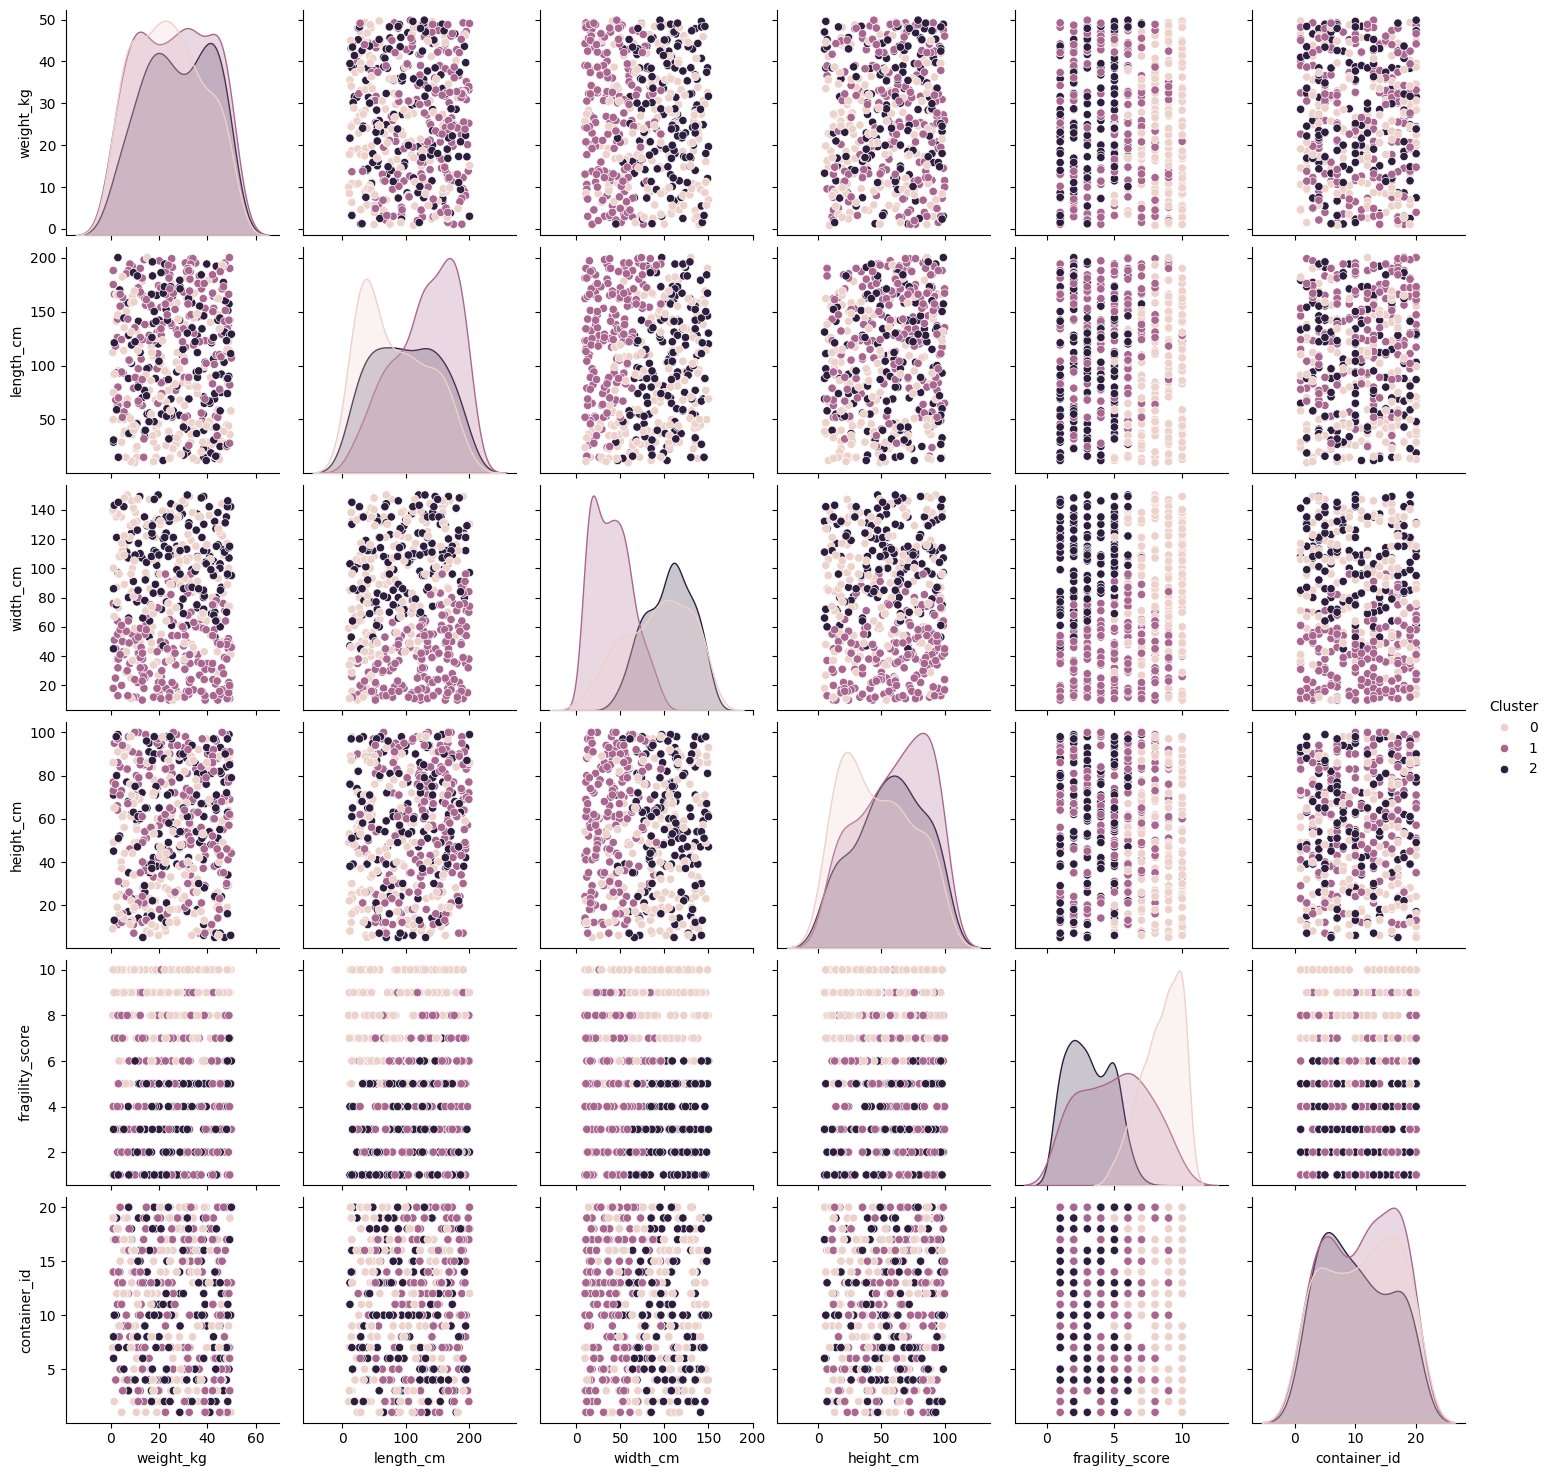

In [ ]:
# Visualize clusters
sns.pairplot(data, hue="Cluster", diag_kind="kde")
plt.show()

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.3 MB/s eta 0:00:00


In [ ]:
from deap import base, creator, tools, algorithms
import random

In [ ]:
# Define problem variables (weights, dimensions, fragility)
num_items = len(data)
weights = data["weight_kg"].tolist()
volumes = (data["length_cm"] * data["width_cm"] * data["height_cm"]).tolist()
fragility = data["fragility_score"].tolist()


In [ ]:
# Create fitness function (minimize space & balance fragility)
def evaluate(individual):
    total_weight = sum(ind * w for ind, w in zip(individual, weights))
    total_volume = sum(ind * v for ind, v in zip(individual, volumes))
    total_fragility = sum(ind * f for ind, f in zip(individual, fragility))
    return (total_volume, total_weight, total_fragility)


In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)


In [ ]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_items)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluate)

# Run Genetic Algorithm
pop = toolbox.population(n=50)
algorithms.eaMuPlusLambda(pop, toolbox, mu=50, lambda_=100, cxpb=0.7, mutpb=0.2, ngen=40, verbose=True)

gen	nevals
0  	50    
1  	91    
2  	93    
3  	91    
4  	91    
5  	87    
6  	94    
7  	91    
8  	88    
9  	87    
10 	92    
11 	93    
12 	89    
13 	92    
14 	92    
15 	91    
16 	91    
17 	92    
18 	86    
19 	90    
20 	88    
21 	95    
22 	90    
23 	91    
24 	91    
25 	92    
26 	86    
27 	88    
28 	90    
29 	91    
30 	93    
31 	88    
32 	94    
33 	91    
34 	94    
35 	91    
36 	88    
37 	89    
38 	89    
39 	94    
40 	89    


([[0,
   0,
   0,
   1,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   1,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   1,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0